In [1]:
import equation
from equation import SDE, GeometricBrownianMotion1D, GeometricBrownianMotionND, BlackSchloesCall1D
import numpy as np
import matplotlib.pyplot as plt
import yaml

# Euler Method

Simulating Steps: 100%|██████████| 1000/1000 [00:03<00:00, 284.75it/s]


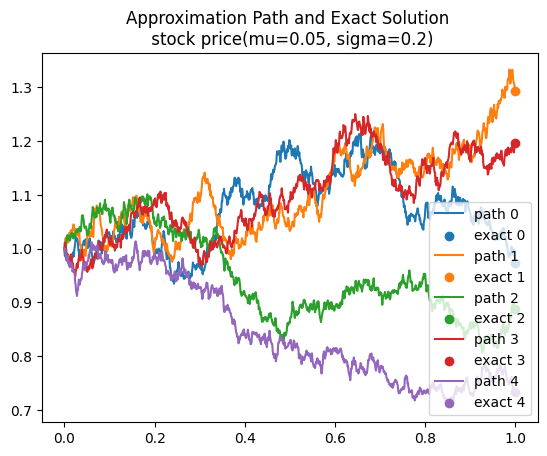

In [2]:
mu = 0.05  
sigma = 0.2
strike = 1.25
rf = 0.05
stock = GeometricBrownianMotion1D(mu, sigma, 'configs.yaml')
call = BlackSchloesCall1D(mu, sigma, strike, rf, configs='configs.yaml')
# y as call exact price
y_exact = call.exact_solution()

t, x, dw = stock.simulate(scheme='euler')
exact = stock.exact_solution(dw)
for i in range(5):
    plt.plot(t, x[i, :].reshape((call.N+1)), label=f'path {i}')
    plt.scatter(call.T, exact[i], label=f'exact {i}')
plt.title(f'Approximation Path and Exact Solution \n stock price(mu={mu}, sigma={sigma})')
plt.legend()
plt.show()

In [3]:
x_T = x[:, -1]
y_T = []
for i in x_T:
    _ = call.terminal_condition(i)
    y_T.append(_)
y_T = np.array(y_T)
y_mc = y_T.mean()
T = call.T
print("exact price", y_exact)
print("Monte Carlo price", y_mc*np.exp(-rf*T))
print("Relative Error Ratio(%)", (y_exact - y_mc*np.exp(-rf*T))/y_exact*100)
# y_exact, y_mc*np.exp(-rf*T), (y_exact - y_mc*np.exp(-rf*T))/y_exact*100

exact price 0.023242744660152276
Monte Carlo price 0.023420095420676315
Relative Error Ratio(%) -0.7630370815375012


In [25]:
M = 1000
dim = 50
x = np.zeros((M, dim, 101))
x0 = np.linspace(0.5, 1.5, dim)
x[:, :, 0] = x0
x.shape

(1000, 50, 101)

In [31]:
x[:, :, 0]

array([[0.5       , 0.52040816, 0.54081633, ..., 1.45918367, 1.47959184,
        1.5       ],
       [0.5       , 0.52040816, 0.54081633, ..., 1.45918367, 1.47959184,
        1.5       ],
       [0.5       , 0.52040816, 0.54081633, ..., 1.45918367, 1.47959184,
        1.5       ],
       ...,
       [0.5       , 0.52040816, 0.54081633, ..., 1.45918367, 1.47959184,
        1.5       ],
       [0.5       , 0.52040816, 0.54081633, ..., 1.45918367, 1.47959184,
        1.5       ],
       [0.5       , 0.52040816, 0.54081633, ..., 1.45918367, 1.47959184,
        1.5       ]])

In [27]:
x[:, 2, :]

array([[0.54081633, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54081633, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54081633, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.54081633, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54081633, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54081633, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])